# Equation Solving

In the previous chapters we have discussed general methodologies and techniques, namely array-based numerical computing, symbolic computing, and visualization. These methods are the cornerstones of scientific computing that make up a fundamental toolset we have at our disposal when attacking computational problems.

Starting from this chapter, we begin to explore how to solve problems from different domains of applied mathematics and computational sciences, using the basic techniques introduced in the previous chapters. The topic of this chapter is **algebraic equation solving**. This is a broad topic that requires application of theory and approaches from multiple fields of mathematics. In particular, when discussing equation solving we have to distinguish between **univariate** and **multivariate** equations (that is, equations that contain one unknown variable, or many unknown variables). In addition, we need to distinguish between **linear** and **nonlinear** equations. This classification is useful because solving equations of these different types requires applying different mathematical methods and approaches.

We begin with linear equation systems, which are tremendously useful and have important applications in every field of science. The reason for this universality is that linear algebra theory allow us to straightforwardly solve linear equations, while nonlinear equations are difficult to solve in general, and typically require more complicated and computationally demanding methods. Because linear systems are readily solvable, they are also an important tool for local approximations of nonlinear systems. For example, by considering small variations from an expansion point, a nonlinear system can often be approximated by a linear system in the local vincinity of the expansion point. However, a linearization can only describe local properties, and for global analysis of nonlinear problems other techniques are required. Such methods typically employ iterative approaches for gradually constructing an increasingly accurate estimate of the solution.

In this chapter, we use *SymPy* for solving equations symbolically, when possible, and use the linear algebra module from the SciPy library for numerically solving linear equation systems. For tackling nonlinear problems, we will use the root-finding functions in the optimize module of SciPy.

> **SciPy** is a Python library, the collective name of the scientific computing environment for Python, and the umbrella organization for many of the core libraries for scientific computing with Python. The library, scipy, is in fact rather a collection of libraries for high-level scientific computing, which are more or less independent of each other. The SciPy library is built on top of _NumPy_, which provide the basic array data structures and fundamental operations on such arrays. The modules in SciPy provide domain specific high-level computation methods, such as routines for linear algebra, optimization, interpolation, integration, and much more. At the time of writing, the most recent version of SciPy is 0.15.1. See http://www.scipy.org for more information.

## 1. Importing Modules

The SciPy package ``scipy`` should be considered a collection of modules that are selectively imported when required. In this chapter we will use the ``scipy.linalg`` module, for solving linear systems of equations; and the ``scipy.optimize`` module, for solving nonlinear equations. In this chapter we assume that these modules are imported as:

In [2]:
from scipy import linalg as la
from scipy import optimize

In this chapter we also use the NumPy, SymPy, and Matplotlib libraries introduced in the previous chapters, and we assume that those libraries are imported following the previously introduced convention:

In [5]:
import sympy
sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt

To get the same behavior in both Python 2 and Python 3 with respect to integer division, we also include the following statement (with is only necessary in Python 2):

In [6]:
from __future__ import division

## 2. Linear Equation Systems

An important application of linear algebra is solving systems of linear equations. There is also linear algebra modules in the NumPy and SciPy libraries, `numpy.linalg` and `scipy.linalg`, which together provide linear algebra routines for numerical problems, that is, for problems that are completely specified in terms of numerical factors and parameters.


A linear system of m equations in n unknown variables {x1, x2, ..., xn}, and where amn and bm are known parameters or constant values.

Ax=B, where A is a `m x n` matrix, b is a `m x 1` matrix (or m-vector), and x is the unknown `n x 1` solution matrix (or n-vector). Depending on the properties of the matrix A, the solution vector x may or may not exist, and if a solution does exist, it is not necessarily unique. However, if a solution exists, then it can be interpreted as an expression of the vector b as a linear combination of the columns of the matrix A, where the coefficients are given by the elements in the solution vector x.

A system for which n > m is said to be underdetermined, because it has less equations than unknown, and therefore cannot completely determine a unique solution. If, on the other hand, m > n, then the equations are said to be overdetermined. This will in general lead to conflicting constraints, resulting in that a solution does not exist.

### Square Systems

Square systems with m=n is an important special case. It corresponds to the situation where the number of equations equals the number unknown variables, and it can therefore potentially have a unique solution. 

The rank, condition number, and norm of a symbolic matrix can be computed in SymPy using the Matrix methods rank, `condition_number` and `norm`, and for numerical problems we can use the NumPy functions `np.linalg.matrix_rank`, `np.linalg.cond` and `np.linalg.norm`.

We can define a problem in SymPy by creating matrix objects for A and b, and compute the rank, condition number, and norm of the matrix A using:

In [8]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])

In [9]:
A.rank()

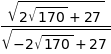

In [10]:
A.condition_number()

In [11]:
sympy.N(_)

In [12]:
A.norm()

We can do the same thing in NumPy/SciPy using NumPy arrays for A and b, and functions from the `np.linalg` and `scipy.linalg` modules:

In [13]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])

In [14]:
np.linalg.matrix_rank(A)

2

In [15]:
np.linalg.cond(A)

In [16]:
np.linalg.norm(A)

A better method is LU factorization of the matrix A, such that img and where L is a lower triangular matrix and U is an upper triangular matrix. 

In [17]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])

In [18]:
L, U, _ = A.LUdecomposition()
L

⎡ 1   0⎤
⎢      ⎥
⎣5/2  1⎦